In [2]:
##A basic model for movie recommendation .
##Here only 6 different movies are taken into account and there are only 5 users .
##The ratings are scaled between 1.0 - 5.0 .
##It is not necessary that a user has rated all the movies . Some ratings may be missing .
##Collaborative filtering approach .
##In the dataset where the user didn't rated a movie a sentinel value has been included explicitly (Here 10.0).
##Here the movies have two features : Romance and action only.
##Here we will predict which movie to watch next out of these 6 movies .
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
alpha = 0.01   ##Learning rate
lamda = 0.01   ##For regularisation
no_of_movies = 6
no_of_users = 5
epochs = 10000  ##No of iterations for gradient Descent to converge at optimal point.

In [3]:
def changerfunc(X,Y,hypothesis,Theta):   ##Extension of GradientDescent function.
    loss = hypothesis
    for i in range(no_of_users):
        for j in range(no_of_movies):
            if(Y[j][i] < 10.0):
                loss[j][i] -= Y[j][i]
            else:
                loss[j][i] = 0.0
    temp1 = alpha*(np.matmul(loss,Theta) + lamda*(X))
    temp2 = alpha*(np.matmul(np.transpose(loss),X) + lamda*(Theta))
    X = X - temp1         ##updating X
    Theta = Theta - temp2   ##updating Theta
    return X,Theta

In [4]:
def costfunc(X,Y,Theta):
    J = 0.0
    for i in range(no_of_movies):
        for j in range(no_of_users):
            hypothesis = np.matmul(X,np.transpose(Theta))  ##hypothesis should be of same size as of Y which will be...
                                                           ##...achieved by multiplying in this way .
            if Y[i][j]<=5.0:                               ##Removing those entries where there is no rating.
                J += ((1/2)*math.pow((hypothesis[i][j] - Y[i][j]),2))    ##This is loss term or least squared error .
    ##Now we add regularisation term to avoid overfitting .
    ##Firstly adding regularisation term because of X.
    for i in range(no_of_movies):
        for j in range(2):
            J += (lamda/2)*math.pow(X[i][j],2)
    ##Now add regularisation term because of Theta matrix.
    for i in range(no_of_users):
        for j in range(2):
            J += (lamda/2)*math.pow(Theta[i][j],2)
    ##Here one thing should be noticed that we have taken account of both X and Theta matrix in a same cost function.
    ##We can do this.As the loss term in the expression of both X and Theta are same so we keep it once and added...
    ##...regularisation term of both matrices.
    return float(J)

In [5]:
def GradientDesc(X,Theta,Y):
    cost = []
    iters = []
    for i in range(epochs):
        J = costfunc(X,Y,Theta)                                ##Function to compute cost.
        hypothesis = np.matmul(X, np.transpose(Theta))         ##Our hypothesis in linear regression .
        cost.append(J)
        iters.append(i)
        X,Theta = changerfunc(X,Y,hypothesis,Theta)
    plt.plot(iters,cost,'-',color = 'b')
    plt.show()
    return X,Theta

In [6]:
def RandInit():
    X = np.random.uniform(low=0.0, high=2.0, size=(6,2) )
    Theta = np.random.uniform(low = 0 ,high = 5,size = (5,2))
    return X,Theta

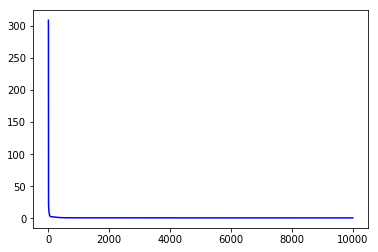

[[ 0.80420191  1.01067397]
 [ 0.92171551  1.33338357]
 [-0.32184499  2.19387091]
 [ 1.51984105  1.149222  ]
 [ 1.39080126  0.28800086]
 [ 0.20720089  2.28890082]]
[[1.38577264 1.39526751]
 [2.37998081 1.06529657]
 [1.02155376 1.63871068]
 [1.41536573 1.69278005]
 [0.06661145 3.34142986]]
Prediction is:
[[2.52460156 2.99065263 2.47773772 2.84908857 3.43066525]
 [3.1377149  3.61411415 3.12661184 3.56168965 4.51680447]
 [2.61503282 1.57113826 3.26633773 3.25821254 7.3092272 ]
 [3.70962626 4.84145478 3.43584171 4.09651101 3.94128351]
 [2.32917259 3.61688664 1.89272835 2.45601456 1.05497797]
 [3.48076228 2.93149233 3.96251307 4.16787069 7.66200351]]
Enter your user number(1-5): 
Finding best suitable movie for you.
Out of the given set of movies that you haven't watched the movie you'll love the most is: 
The Night Listener


In [8]:
def main():
    data = pd.read_csv('Ratings.csv',header = None,usecols = range(0,6)).values  ##Importing data
    data = data[1:]
    Y = np.delete(data,0,1)   ##Forming the matrix of ratings by users .
    for i in range(no_of_movies):
        for j in range(no_of_users):
            Y[i][j] = float(Y[i][j])
    ##In matrix 10.0 denotes a sentinel value which means that user hasn't rated that movie.
    X,Theta = RandInit()   ##Here X is a matrix which denotes that what fraction of movie is romance and what part of it
                           ##is action. Theta denotes that how much that a user likes romance movie and how much they
                           ##...like an action movie.These lie between 0 - 5 .
    ##Now X and transpose(Theta) should be equal to Y.
    ##Now we will get the X and Theta matrix using supervised learning . We will use linear regression to predict...
    ##...the similar movies and X and Theta.
    X,Theta = GradientDesc(X,Theta,Y)
    print(X)
    print(Theta)

    print("Prediction is:")
    predict = np.matmul(X,np.transpose(Theta))
    print(predict)   ##This should be close to Y if your approach is correct.

    print("Enter your user number(1-5): ")
    a = eval(input())
    print("Finding best suitable movie for you.")
    set_to_watch = []   ##Set of movies which user hasn't watched.
    for i in range(no_of_movies):
        if(Y[i][a-1]>5.0):
            set_to_watch.append(i)
    max = 0.0
    num = -1
    for i in range(len(set_to_watch)):
        if(predict[set_to_watch[i]-1][a-1]>max):
            max = predict[set_to_watch[i]-1][a-1]
            num = set_to_watch[i]
        else:
            continue
    print("Out of the given set of movies that you haven't watched the movie you'll love the most is: ")
    print(data[i-1][0])
main()